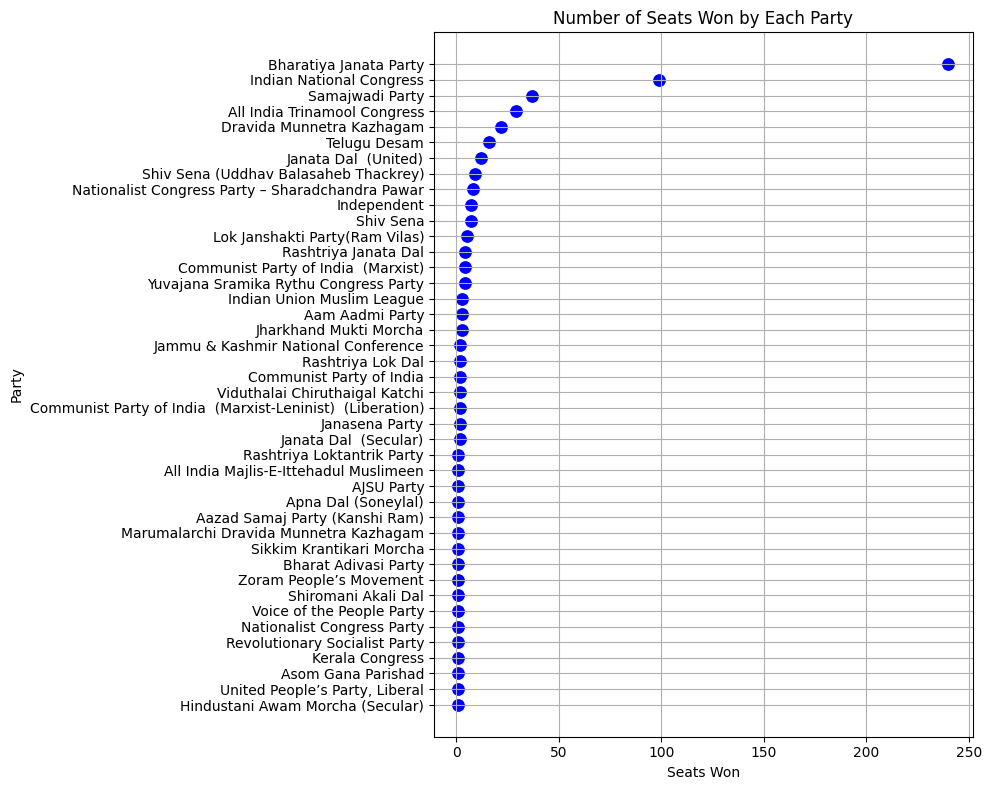

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from CSV file
df = pd.read_csv('/content/election_results_with_constituencies (1).csv')

# Filter rows where the 'Status' is 'won'
won_df = df[df['Status'].str.lower() == 'won']

# Count the number of seats won by each party
party_won_counts = won_df['Party'].value_counts().reset_index()
party_won_counts.columns = ['Party', 'Seats Won']

# Plotting the data with a dot plot
plt.figure(figsize=(10, 8))  # Adjust the figure size
sns.scatterplot(x='Seats Won', y='Party', data=party_won_counts, s=100, color='blue')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.grid(True)
plt.tight_layout()  # Adjust the padding between and around subplots to prevent clipping
plt.show()


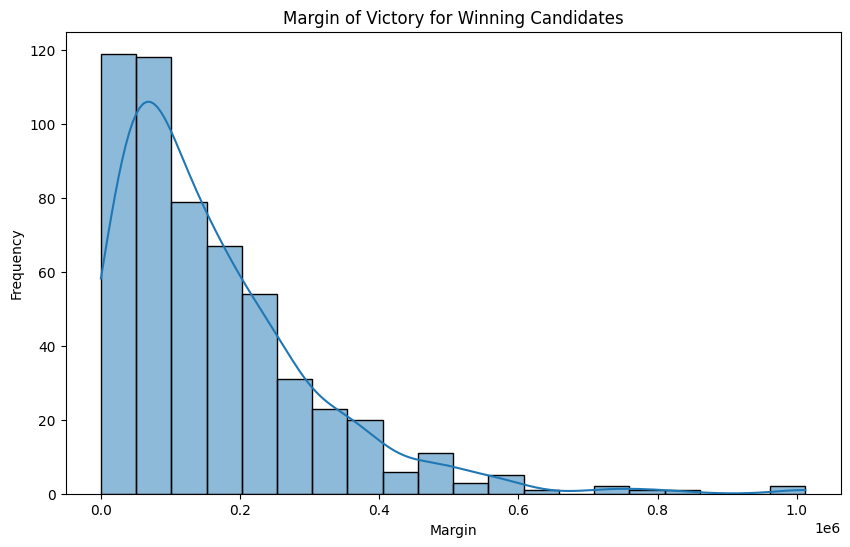

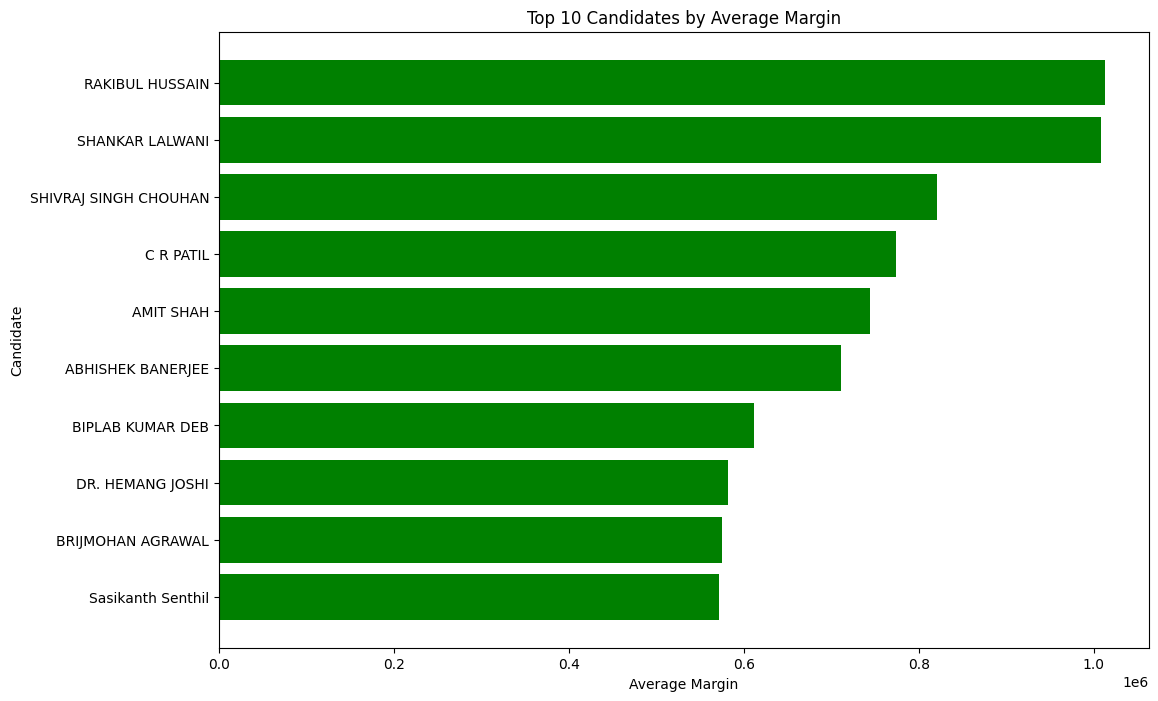

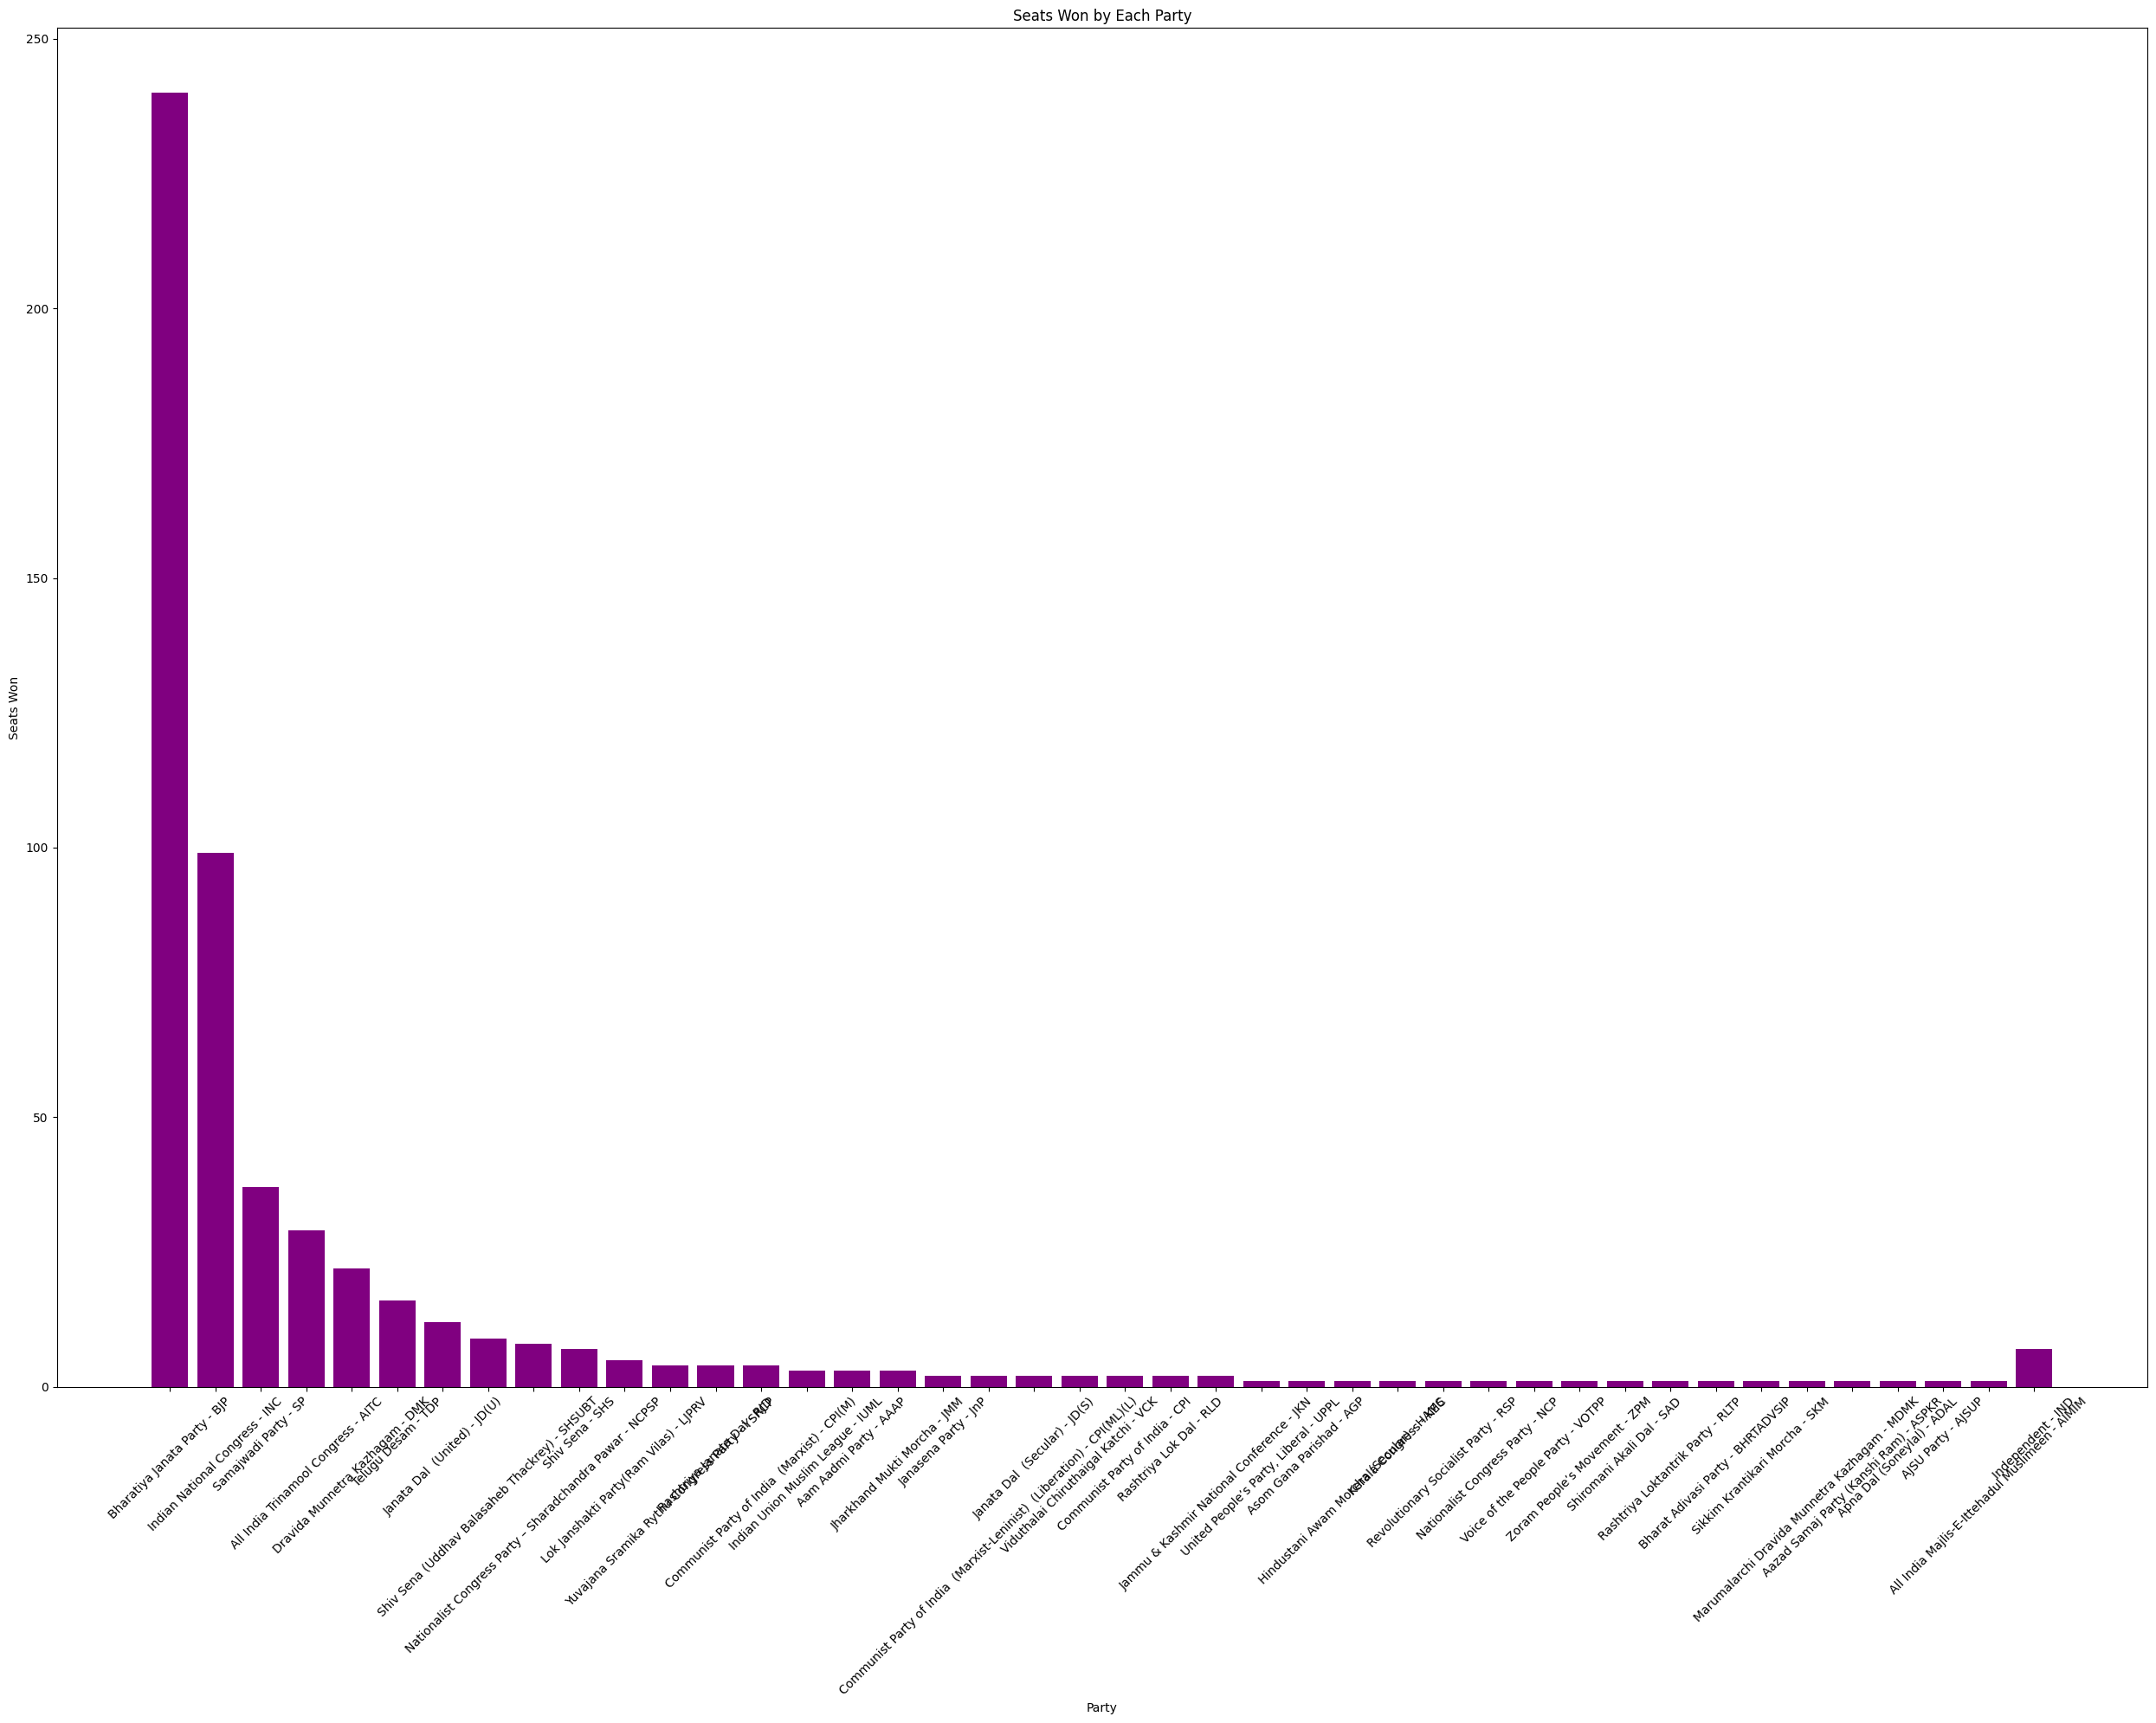

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/content/election_results_with_constituencies (2).csv')


# Convert the Margin to a numerical value (assuming Margin is a string like '(+ 296530)')
# Convert 'Margin' column to string first
data['Margin'] = data['Margin'].astype(str)
data['Margin'] = data['Margin'].str.extract(r'([\+\-]?\d+)')
data['Margin'] = data['Margin'].fillna(0).astype(int)

# 3. Margin of Victory
winning_margins = data[data['Status'] == 'won']['Margin']
plt.figure(figsize=(10, 6))
sns.histplot(winning_margins, bins=20, kde=True)
plt.title('Margin of Victory for Winning Candidates')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()
# Calculate average margin per candidate
plt.figure(figsize=(12, 8))

top_10_candidates = avg_margin_per_candidate.head(10)
plt.barh(top_10_candidates.index, top_10_candidates.values, color='green')
plt.xlabel('Average Margin')
plt.ylabel('Candidate')
plt.title('Top 10 Candidates by Average Margin')
plt.gca().invert_yaxis()  # Invert y-axis to show highest margin at the top
plt.show()

# Plotting seats won by each party
plt.figure(figsize=(25, 20))

plt.bar(data['Party'], data['Won'], color='purple')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.title('Seats Won by Each Party')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-29-f69d95ef081f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constituency_data['Votes'] = pd.to_numeric(constituency_data['Votes'], errors='coerce')


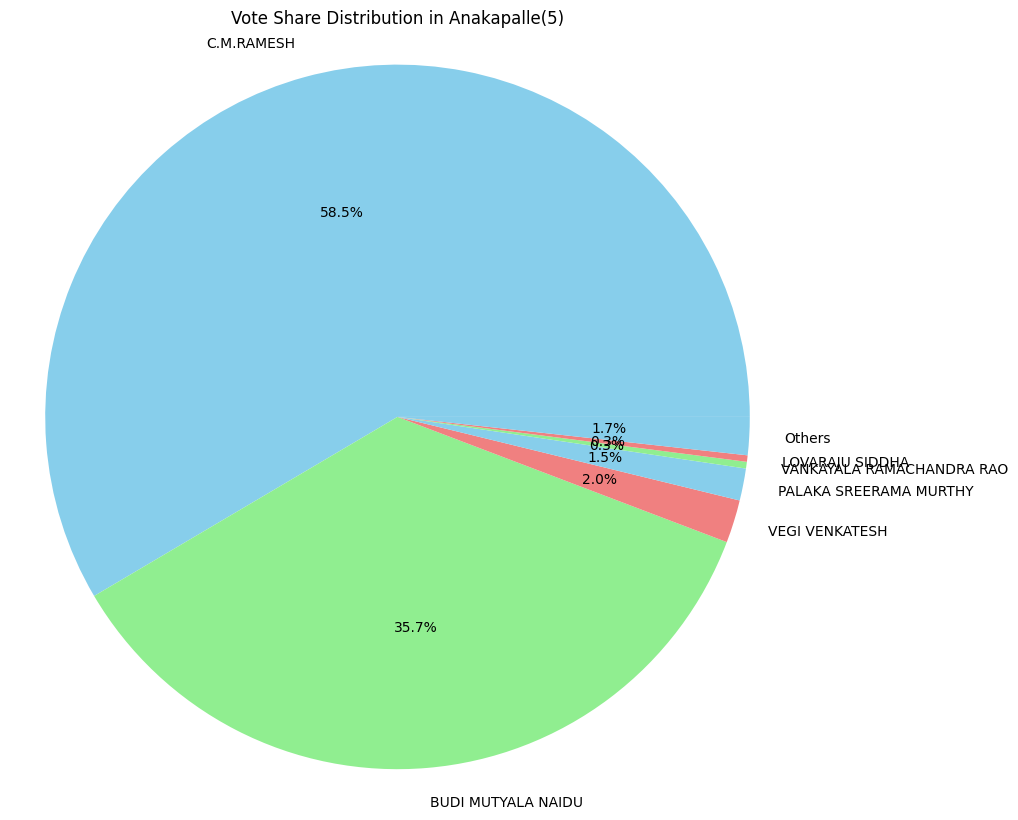

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors  # Import mplcursors for cursor hover support

# Load the data
data = pd.read_csv('/content/ASSEMBLY.csv')

# Filter data for a specific constituency (e.g., 'Anakapalle(5)')
constituency_data = data[data['Parliamentary Constituency'] == 'Anakapalle(5)']

# Convert 'Votes' column to numeric, coercing errors to NaN
constituency_data['Votes'] = pd.to_numeric(constituency_data['Votes'], errors='coerce')

# Drop rows with NaN (if needed) or handle them appropriately
constituency_data = constituency_data.dropna()

# Sort by votes in descending order to prioritize top candidates
constituency_data = constituency_data.sort_values(by='Votes', ascending=False)

# Keep the top 6 candidates separate, aggregate the rest into 'Others'
top_candidates = constituency_data.head(6)
others_votes = constituency_data.iloc[5:]['Votes'].sum()

# Create a new DataFrame for pie chart
others_data = pd.DataFrame([{'Candidate Name': 'Others', 'Votes': others_votes}])

# Concatenate top candidates and 'Others' into one DataFrame
pie_data = pd.concat([top_candidates, others_data], ignore_index=True)

# Plotting vote share analysis using a pie chart
plt.figure(figsize=(10, 10))

# Create the pie chart
patches, texts, autotexts = plt.pie(pie_data['Votes'], labels=pie_data['Candidate Name'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])

# Add hover annotations using mplcursors
cursor = mplcursors.cursor(hover=True)
cursor.connect('add', lambda sel: sel.annotation.set_text(f"{pie_data['Candidate Name'][sel.target.index]}: {pie_data['Votes'][sel.target.index]} votes"))

plt.title('Vote Share Distribution in Anakapalle(5)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()





In [22]:
pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.8 MB/s eta 0:00:00
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20727 sha256=841a6e0b69b7b0b175faabd925b973ea4abecb63d06364dc377834e3e0edde30
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


<ipython-input-34-9ea7f86098c2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Margin'] = df['Margin'].astype(str)
<ipython-input-34-9ea7f86098c2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Margin'] = df['Margin'].str.extract(r'([\+\-]?\d+)')
<ipython-input-34-9ea7f86098c2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

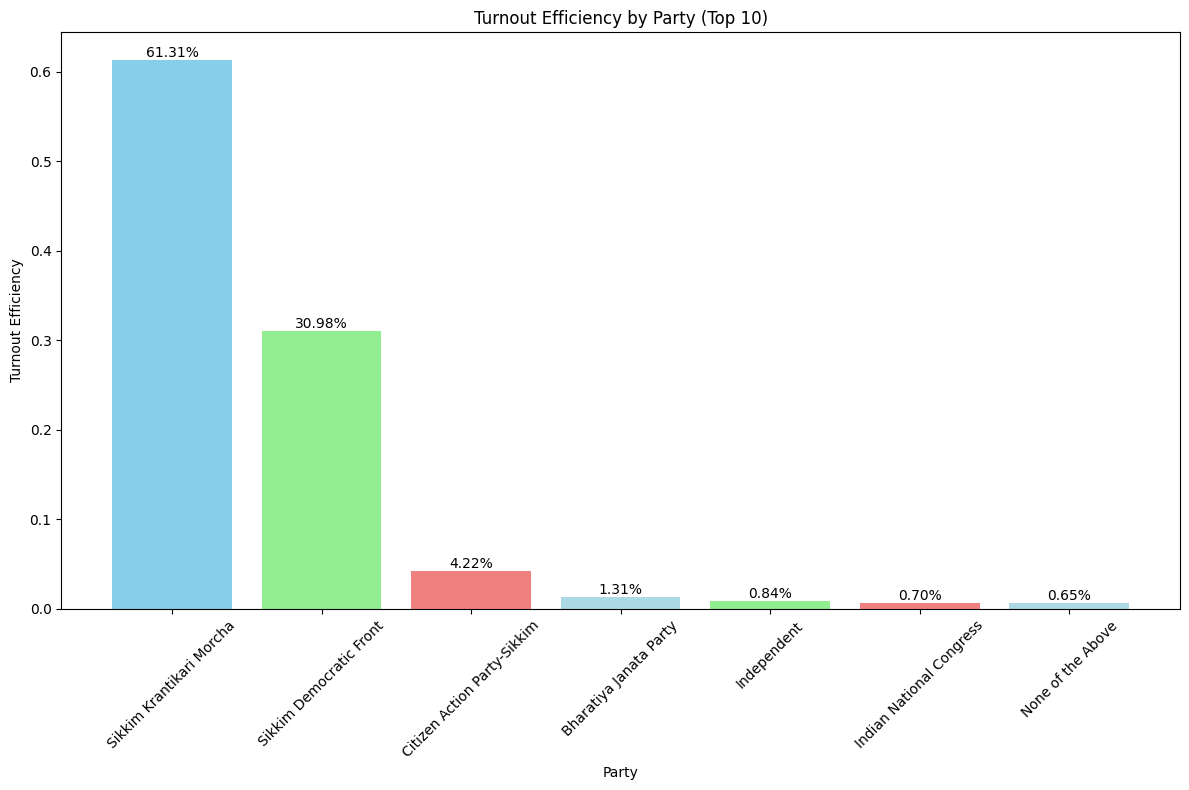

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('/content/ASSEMBLY.csv')
df = df1.head(10)

# Convert Margin to numeric value
df['Margin'] = df['Margin'].astype(str)
df['Margin'] = df['Margin'].str.extract(r'([\+\-]?\d+)')
df['Margin'] = df['Margin'].fillna(0).astype(int)

# Convert Votes to numeric values
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Convert Margin to numeric value


# Total votes cast in the constituency
total_votes_cast = df['Votes'].sum()

# Calculate total votes for each party
party_votes = df.groupby('Party')['Votes'].sum()

# Calculate Turnout Efficiency for each party
party_turnout_efficiency = party_votes / total_votes_cast

# Select top 10 parties based on Turnout Efficiency
top_10_parties = party_turnout_efficiency.nlargest(10)

# Visualization of Turnout Efficiency for top 10 parties
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_parties.index, top_10_parties.values, color=['skyblue', 'lightgreen', 'lightcoral', 'lightblue', 'lightgreen', 'lightcoral', 'lightblue', 'lightgreen', 'lightcoral', 'lightblue'])
plt.xlabel('Party')
plt.ylabel('Turnout Efficiency')
plt.title('Turnout Efficiency by Party (Top 10)')

# Adding data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2%}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()